<a href="https://colab.research.google.com/github/soumyakandari/MLnow_2.0/blob/main/MLassignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Assignment no.1***


[Link to Download the dataset](https://www.kaggle.com/sudalairajkumar/covid19-in-india?select=covid_vaccine_statewise.csv)

Date Created: 13th June , 2021

Topic: Univariate Linear Regression 

Author:
Soumya Kandari

[[Assessment Repository](https://github.com/soumyakandari/MLnow_2.0/)]

# Set Up

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/Colab Notebooks/02_EDA/covid_vaccination'

/content/drive/MyDrive/Colab Notebooks/02_EDA/covid_vaccination


In [4]:
ls

covid_19_india.csv  covid_vaccine_statewise.csv  StatewiseTestingDetails.csv


In [5]:
import os

In [6]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [7]:
#load the csv file as a dataframe

mathData =pd.read_csv('covid_vaccine_statewise.csv')


In [8]:
mathData.tail(10)

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
5318,30/05/2021,West Bengal,10547015.0,381157.0,1170.0,10547015.0,3865954.0,5871662.0,4674095.0,1258.0,1625834.0,12787135.0,0.0,1100.0,2202804.0,4404252.0,3938023.0,14412969.0
5319,31/05/2021,West Bengal,10838457.0,839415.0,2511.0,10838457.0,3879678.0,6050228.0,4786796.0,1433.0,1650999.0,13067136.0,0.0,1144.0,2402085.0,4469534.0,3964698.0,14718135.0
5320,01/06/2021,West Bengal,11075394.0,781523.0,2249.0,11075394.0,3893763.0,6194489.0,4879421.0,1484.0,1677903.0,13291254.0,0.0,1148.0,2552320.0,4530593.0,3990153.0,14969157.0
5321,02/06/2021,West Bengal,11283299.0,790334.0,1988.0,11283299.0,3903113.0,6317601.0,4964153.0,1545.0,1693274.0,13493138.0,0.0,1184.0,2659657.0,4602658.0,4018278.0,15186412.0
5322,03/06/2021,West Bengal,11514760.0,803979.0,2104.0,11514760.0,3915654.0,6452599.0,5060564.0,1597.0,1712330.0,13718084.0,0.0,1208.0,2762061.0,4691823.0,4057835.0,15430414.0
5323,04/06/2021,West Bengal,11795260.0,937852.0,2500.0,11795260.0,3931230.0,6615547.0,5178013.0,1700.0,1749972.0,13976518.0,0.0,1210.0,2874071.0,4810523.0,4107132.0,15726490.0
5324,05/06/2021,West Bengal,12090072.0,981547.0,2517.0,12090072.0,3941080.0,6784722.0,5303588.0,1762.0,1806377.0,14224775.0,0.0,1211.0,2999339.0,4927157.0,4159589.0,16031152.0
5325,06/06/2021,West Bengal,12206706.0,479793.0,1016.0,12206706.0,3943243.0,6851075.0,5353848.0,1783.0,1825771.0,14324178.0,0.0,1214.0,3058135.0,4968447.0,4175911.0,16149949.0
5326,07/06/2021,West Bengal,12492937.0,1062959.0,2523.0,12492937.0,3960942.0,7014307.0,5476794.0,1836.0,1878776.0,14575103.0,0.0,1223.0,3174029.0,5087762.0,4226545.0,16453879.0
5327,08/06/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


**Data Processing**

In [9]:
#consider the below columns from the dataframe


mathData = mathData[['Total Individuals Vaccinated', 'First Dose Administered', 'Second Dose Administered', 'Total Covaxin Administered', 'Total CoviShield Administered', '18-45 years (Age)', '45-60 years (Age)', '60+ years (Age)', 'Total Doses Administered']]

mathData.head(4)

,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,48276.0,48276.0,0.0,579.0,47697.0,NaN,NaN,NaN,48276.0
1,58604.0,58604.0,0.0,635.0,57969.0,NaN,NaN,NaN,58604.0
2,99449.0,99449.0,0.0,1299.0,98150.0,NaN,NaN,NaN,99449.0
3,195525.0,195525.0,0.0,3017.0,192508.0,NaN,NaN,NaN,195525.0


In [10]:
mathData.to_csv('cleanedMathData.csv') #export the mathData as cleanedMathData as csv file

In [11]:
ls

cleanedMathData.csv  covid_vaccine_statewise.csv
covid_19_india.csv   StatewiseTestingDetails.csv


# **Data Visualization**

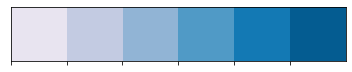

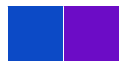

In [12]:
import seaborn as sns
sns.palplot(sns.color_palette('PuBu')) #Purple to Blue colors
pal = sns.color_palette('PuBu', 8) #print8 color shades from Purple to Blue
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#0c4ac6', '#6c0cc6'] #blue Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [13]:
mathData.columns # columns in dataframe

Index(['Total Individuals Vaccinated', 'First Dose Administered',
       'Second Dose Administered', 'Total Covaxin Administered',
       'Total CoviShield Administered', '18-45 years (Age)',
       '45-60 years (Age)', '60+ years (Age)', 'Total Doses Administered'],
      dtype='object')

A pairplot is a plot where the `x` axis and `y` axis will have all the columns you specify it with. 

NOW TAKING ONLY SOME ROWS FROM THE DATASET 

In [17]:
mathData_rows = mathData.iloc[28:150]
mathData_rows

,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
28,7687352.0,7687352.0,20859.0,781304.0,6906048.0,NaN,NaN,NaN,7708211.0
29,7710367.0,7710367.0,21911.0,786042.0,6924325.0,NaN,NaN,NaN,7732278.0
30,8111162.0,8111162.0,142489.0,825093.0,7286069.0,NaN,NaN,NaN,8253651.0
31,8337600.0,8337600.0,239626.0,841412.0,7496188.0,NaN,NaN,NaN,8577226.0
32,8704698.0,8704698.0,318541.0,894555.0,7810143.0,NaN,NaN,NaN,9023239.0
...,...,...,...,...,...,...,...,...,...
145,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0
146,42.0,42.0,0.0,0.0,42.0,NaN,NaN,NaN,42.0
147,89.0,89.0,0.0,0.0,89.0,NaN,NaN,NaN,89.0
148,124.0,124.0,0.0,0.0,124.0,NaN,NaN,NaN,124.0


In [23]:
#visualizing the mid 50 datasets
mathData_rows = mathData.iloc[90:140]
mathData_rows

,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
90,102927296.0,102927296.0,14378048.0,10178643.0,107126700.0,10469609.0,46998499.0,45438828.0,117305344.0
91,104950409.0,104950409.0,15020960.0,10555424.0,109415944.0,10546237.0,48281098.0,46102623.0,119971369.0
92,105896430.0,105896430.0,15310668.0,10711610.0,110495487.0,10573998.0,48885888.0,46416081.0,121207098.0
93,108178574.0,108178574.0,16278588.0,11106751.0,113350410.0,10717276.0,50242630.0,47198108.0,124457162.0
94,110165234.0,110165234.0,17263653.0,11515707.0,115913179.0,10827001.0,51441470.0,47876178.0,127428887.0
95,111673361.0,111673361.0,17972744.0,11799916.0,117846188.0,10889235.0,52371179.0,48391750.0,129646105.0
96,113584269.0,113584269.0,19170339.0,12176768.0,120577839.0,10972801.0,53528676.0,49056017.0,132754608.0
97,115461202.0,115461202.0,20197122.0,12507127.0,123151196.0,11075950.0,54681402.0,49673372.0,135658324.0
98,117105343.0,117105343.0,21080613.0,12775153.0,125410802.0,11161742.0,55725179.0,50185235.0,138185956.0
99,117795008.0,117795008.0,21390165.0,12866845.0,126318327.0,11194950.0,56163123.0,50403597.0,139185173.0


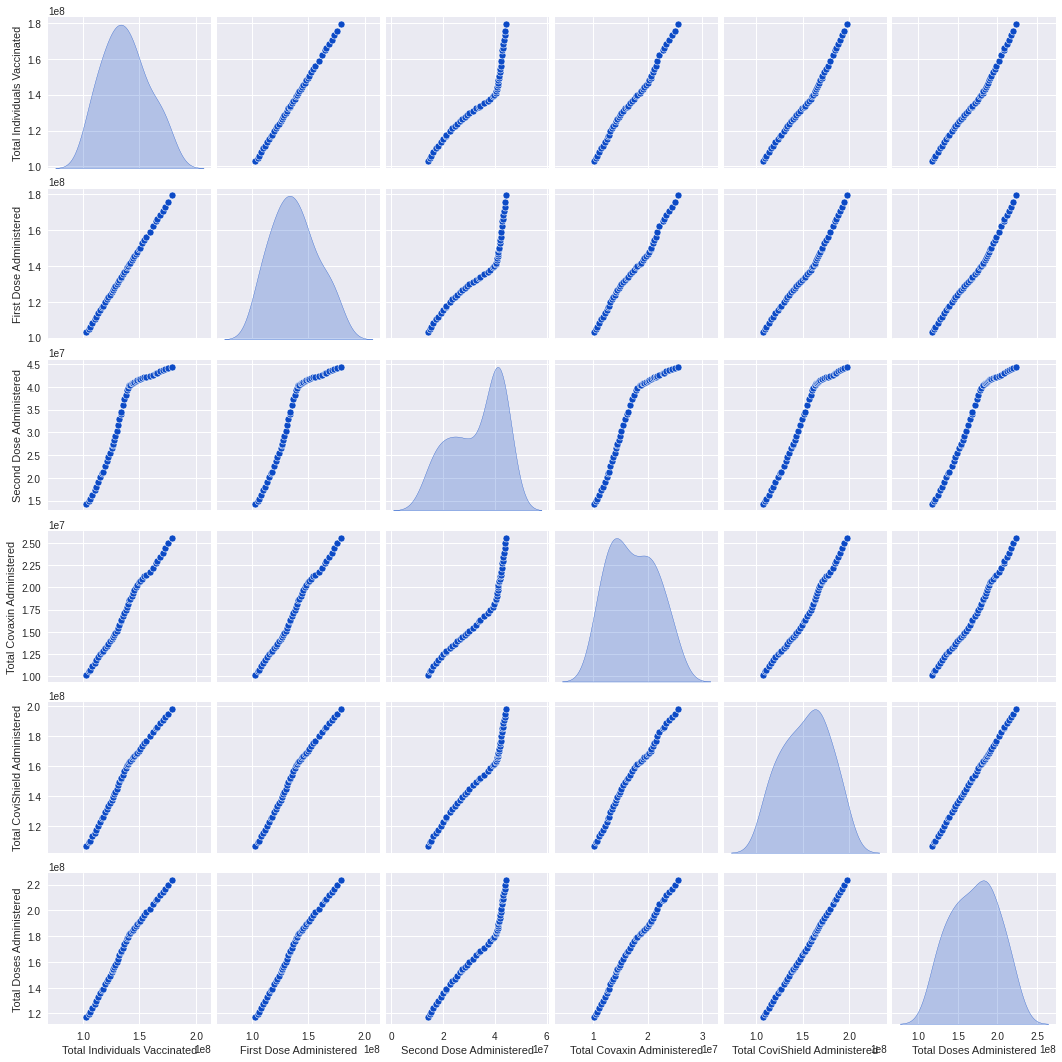

In [24]:
#pairplot for all the values

sns.pairplot(mathData_rows,
             x_vars = ['Total Individuals Vaccinated', 'First Dose Administered', 'Second Dose Administered', 'Total Covaxin Administered', 'Total CoviShield Administered'
                                            , 'Total Doses Administered'],
             y_vars = ['Total Individuals Vaccinated', 'First Dose Administered', 'Second Dose Administered',
                       'Total Covaxin Administered', 'Total CoviShield Administered', 'Total Doses Administered'],
       diag_kind='kde'
             )

*Plotting a graph between no `first dose` vs `second dose`*

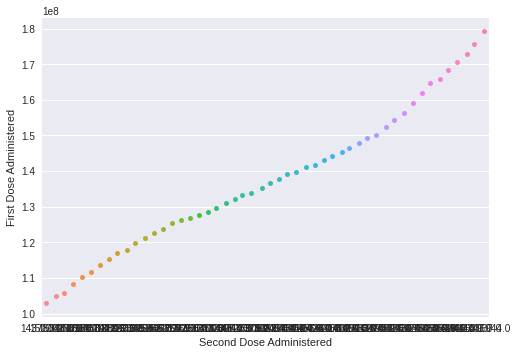

In [27]:
sns.stripplot(y='First Dose Administered', x='Second Dose Administered', data=mathData_rows)

PLotting a graph between `No.of covaxin` vs `no. of covishield`

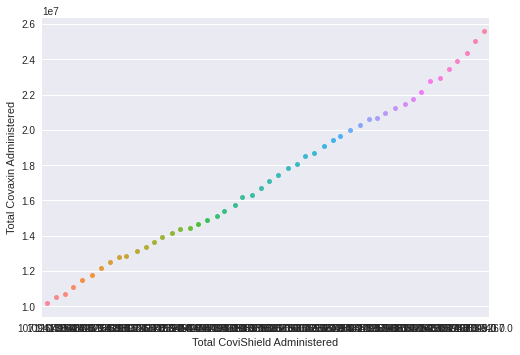

In [28]:
sns.stripplot(y='Total Covaxin Administered', x='Total CoviShield Administered', data=mathData_rows)

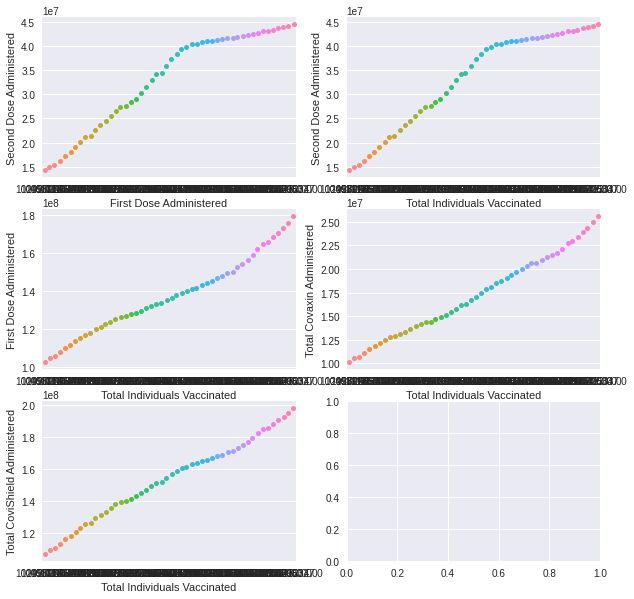

In [30]:
# stripplots plotted as subplots on one main plot with the ax parameter

fig, axarr = plt.subplots(3,2, figsize=(10,10))

sns.stripplot(y='Second Dose Administered', x='First Dose Administered', data=mathData_rows, hue=None, ax=axarr[0][0])
sns.stripplot(y='Second Dose Administered', x='Total Individuals Vaccinated', data=mathData_rows, hue=None, ax=axarr[0][1])
sns.stripplot(y='First Dose Administered', x='Total Individuals Vaccinated', data=mathData_rows, hue=None, ax=axarr[1][0])
sns.stripplot(y='Total Covaxin Administered', x='Total Individuals Vaccinated', data=mathData_rows, hue=None,  ax=axarr[1][1])
sns.stripplot(y='Total CoviShield Administered', x='Total Individuals Vaccinated', data=mathData_rows, hue=None, ax=axarr[2][0])


**Data Splits**

In [41]:
#80-20 train-test percent split

trainDataset = mathData_rows.sample(frac=0.8, random_state=0) 
testDataset = mathData_rows.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     Total Individuals Vaccinated  ...  Total Doses Administered
118                   139861462.0  ...               179646413.0
101                   121263287.0  ...               144879233.0
100                   119886252.0  ...               142524947.0
131                   159006359.0  ...               201438120.0
92                    105896430.0  ...               121207098.0

[5 rows x 9 columns]
     Total Individuals Vaccinated  ...  Total Doses Administered
90                    102927296.0  ...               117305344.0
93                    108178574.0  ...               124457162.0
99                    117795008.0  ...               139185173.0
109                   129730641.0  ...               159931238.0
111                   132294827.0  ...               165190000.0

[5 rows x 9 columns]


In [42]:
print(trainDataset.shape)
print(testDataset.shape)


(40, 9)
(10, 9)


In [53]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     Total Individuals Vaccinated  ...  Total Doses Administered
118                   139861462.0  ...               179646413.0
101                   121263287.0  ...               144879233.0
100                   119886252.0  ...               142524947.0
131                   159006359.0  ...               201438120.0
92                    105896430.0  ...               121207098.0

[5 rows x 9 columns]
     Total Individuals Vaccinated  ...  Total Doses Administered
90                    102927296.0  ...               117305344.0
93                    108178574.0  ...               124457162.0
99                    117795008.0  ...               139185173.0
109                   129730641.0  ...               159931238.0
111                   132294827.0  ...               165190000.0

[5 rows x 9 columns]


In [54]:
#removing the  Total Individuals Vaccinated column and saving it into the labels variable

trainLabels = trainFeatures.pop('Total Individuals Vaccinated')
testLabels = testFeatures.pop('Total Individuals Vaccinated')

print(trainLabels.head())
print(testLabels.head())

118    139861462.0
101    121263287.0
100    119886252.0
131    159006359.0
92     105896430.0
Name: Total Individuals Vaccinated, dtype: float64
90     102927296.0
93     108178574.0
99     117795008.0
109    129730641.0
111    132294827.0
Name: Total Individuals Vaccinated, dtype: float64


In [45]:
print(trainFeatures.head())
print(testFeatures.head())


     First Dose Administered  ...  Total Doses Administered
118              139861462.0  ...               179646413.0
101              121263287.0  ...               144879233.0
100              119886252.0  ...               142524947.0
131              159006359.0  ...               201438120.0
92               105896430.0  ...               121207098.0

[5 rows x 8 columns]
     First Dose Administered  ...  Total Doses Administered
90               102927296.0  ...               117305344.0
93               108178574.0  ...               124457162.0
99               117795008.0  ...               139185173.0
109              129730641.0  ...               159931238.0
111              132294827.0  ...               165190000.0

[5 rows x 8 columns]


In [46]:
print(testFeatures.shape)

(10, 8)


Univariate linear regression

In [47]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [48]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [55]:
numEpochs = 5000
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
2/2 [==============================] - 0s 45ms/step - loss: 162826.0000 - mae: 162826.0000 - mse: 43982454784.0000 - val_loss: 243448.0000 - val_mae: 243448.0000 - val_mse: 84248051712.0000
Epoch 2502/5000
2/2 [==============================] - 0s 26ms/step - loss: 177979.2031 - mae: 177979.2031 - mse: 51758907392.0000 - val_loss: 205254.4062 - val_mae: 205254.4062 - val_mse: 67883257856.0000
Epoch 2503/5000
2/2 [==============================] - 0s 26ms/step - loss: 153511.4062 - mae: 153511.4062 - mse: 42096513024.0000 - val_loss: 247650.4062 - val_mae: 247650.4062 - val_mse: 96084975616.0000
Epoch 2504/5000
2/2 [==============================] - 0s 28ms/step - loss: 219387.2031 - mae: 219387.2031 - mse: 70726909952.0000 - val_loss: 211714.4062 - val_mae: 211714.4062 - val_mse: 68105953280.0000
Epoch 2505/5000
2/2 [==============================] - 0s 25ms/step - loss: 159130.5938 - mae: 159130.5938 - mse: 43031191552